In [10]:
from datasets import load_dataset

# Load dataset, shuffle dataset and grab all rows in dataset with no prompts
dataset = load_dataset("pisterlabs/promptset")

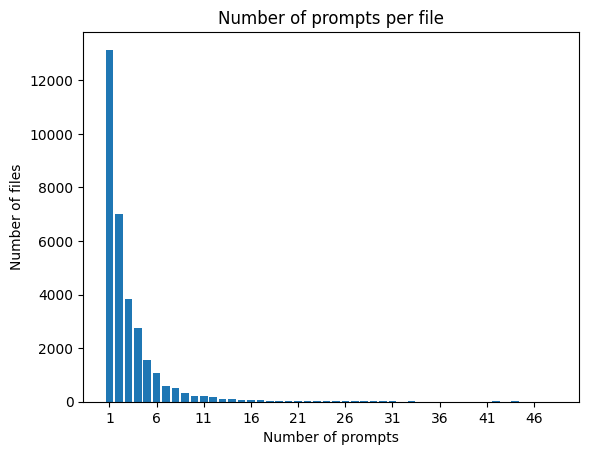

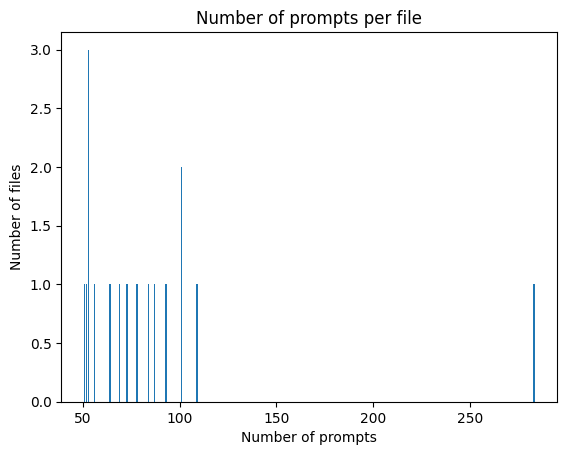

In [27]:
prompt_set = dataset.filter(lambda x: len(x['prompts']) != 0)
prompt_count_to_file_count_under50 = {}
prompt_count_to_file_count_over50 = {}

for row in prompt_set["train"]:
    prompt_count = len(row["prompts"])
    if prompt_count < 50:
        prompt_count_to_file_count_under50[prompt_count] = prompt_count_to_file_count_under50.get(prompt_count, 0) + 1
    if prompt_count > 50:
        prompt_count_to_file_count_over50[prompt_count] = prompt_count_to_file_count_over50.get(prompt_count, 0) + 1

# Make bar graph < 50
import matplotlib.pyplot as plt
import numpy as np
plt.bar(prompt_count_to_file_count_under50.keys(), prompt_count_to_file_count_under50.values())
plt.xlabel("Number of prompts")
plt.ylabel("Number of files")
plt.title("Number of prompts per file")
xticks = range(1, max(prompt_count_to_file_count_under50.keys())+1, 5)
plt.xticks(xticks)
plt.show()

# Make bar graph > 50
plt.bar(prompt_count_to_file_count_over50.keys(), prompt_count_to_file_count_over50.values())
plt.xlabel("Number of prompts")
plt.ylabel("Number of files")
plt.title("Number of prompts per file")
plt.show()



In [28]:
print(f"Number of files with no prompts: {len(dataset['train'].filter(lambda x: len(x['prompts']) == 0))}") 
print(f"Number of files with prompts: {len(dataset['train'].filter(lambda x: len(x['prompts']) != 0))}")

Number of files with no prompts: 60975
Number of files with prompts: 32167
